In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
#pip install kmodes

In [6]:
# imports the dataset
df = pd.read_csv("sf_airbnb_listings.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") 

In [7]:
header = df.iloc[0]
# take the rest of your data minus the header row
df = df[1:]
# set the header row as the df header
df.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,958,https://www.airbnb.com/rooms/958,2.02E+13,6/2/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/2008,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"[''''email'''', ''''phone'''', ''''facebook'''...",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,170.0,1120.0,4200.0,100.0,100.0,2.0,25.0,1.0,30.0,1.0,1.0,30.0,30.0,1.0,30.0,2 months ago,t,1.0,3.0,7.0,92.0,6/2/2019,192.0,56.0,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,{SAN FRANCISCO},t,f,moderate,f,f,1.0,1.0,0.0,0.0,1.6
2,5858,https://www.airbnb.com/rooms/5858,2.02E+13,6/2/2019,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,3/2/2009,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.c

In [4]:
df['zipcode'] = df.zipcode.astype('category')
df['latitude'] = df.latitude.astype('category')
df['longitude'] = df.longitude.astype('category')
df['maximum_nights'] = df.maximum_nights.astype('category')
df['minimum_minimum_nights'] = df.minimum_minimum_nights.astype('category')
df['amenities'] = df.amenities.astype('category')
df['bed_type'] = df.bed_type.astype('category')
df['property_type'] = df.property_type.astype('category')

# df['neighbourhood'] = df.neighbourhood.astype(int)
# df['room_type'] = df.room_type.astype(int)

In [5]:
df.dtypes

0
id                                                object
listing_url                                       object
scrape_id                                         object
last_scraped                                      object
name                                              object
summary                                           object
space                                             object
description                                       object
experiences_offered                               object
neighborhood_overview                             object
notes                                             object
transit                                           object
access                                            object
interaction                                       object
house_rules                                       object
thumbnail_url                                     object
medium_url                                        object
picture_url                  

In [10]:
columns="host_id host_response_rate instant_bookable host_listings_count host_total_listings_count accommodates bathrooms bedrooms beds price weekly_price monthly_price security_deposit cleaning_fee guests_included minimum_nights maximum_minimum_nights minimum_maximum_nights maximum_maximum_nights minimum_nights_avg_ntm maximum_nights_avg_ntm availability_30 availability_60 availability_90 availability_365 number_of_reviews number_of_reviews_ltm review_scores_rating review_scores_accuracy review_scores_cleanliness review_scores_checkin review_scores_communication review_scores_location review_scores_value calculated_host_listings_count calculated_host_listings_count_entire_homes calculated_host_listings_count_private_rooms calculated_host_listings_count_shared_rooms neighbourhood room_type reviews_per_month".split()

In [11]:
columns

['host_id',
 'host_response_rate',
 'instant_bookable',
 'host_listings_count',
 'host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'neighbourhood',
 'room_type',
 'reviews_per_month']

In [12]:
df2=pd.DataFrame(df, columns=columns)
df2.dtypes

host_id                                         object
host_response_rate                              object
instant_bookable                                object
host_listings_count                             object
host_total_listings_count                       object
accommodates                                    object
bathrooms                                       object
bedrooms                                        object
beds                                            object
price                                           object
weekly_price                                    object
monthly_price                                   object
security_deposit                                object
cleaning_fee                                    object
guests_included                                 object
minimum_nights                                  object
maximum_minimum_nights                          object
minimum_maximum_nights                          object
maximum_ma

In [13]:
# transforms categorical valuses in column to numeric
le = preprocessing.LabelEncoder()
df2['neighbourhood'] = le.fit_transform(df2.neighbourhood.values) 
df2['room_type'] = le.fit_transform(df2.room_type.values)
df2['instant_bookable'] = le.fit_transform(df2.instant_bookable.values)
df2.fillna(0, inplace=True)
df2.to_csv('df2.csv')
df2

,host_id,host_response_rate,instant_bookable,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type,reviews_per_month
1,1169,100%,1,1.0,1.0,3.0,1.0,1.0,2.0,170.0,1120.0,4200.0,100.0,100.0,2.0,1.0,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,26,0,1.6
2,8904,100%,0,2.0,2.0,5.0,1.0,2.0,3.0,235.0,1600.0,5500.0,0,100.0,2.0,30.0,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3,0,0.9
3,21994,100%,0,10.0,10.0,2.0,4.0,1.0,1.0,65.0,485.0,1685.0,200.0,50.0,1.0,32.0,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,0.0,9.0,0.0,6,1,0.1
4,21994,100%,0,10.0,10.0,2.0,4.0,1.0,1.0,65.0,490.0,1685.0,200.0,50.0,1.0,32.0,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,9.0,0.0,9.0,0.0,6,1,0.1
5,24215,100%,0,2.0,2.0,5.0,1.5,2.0,2.0,685.0,0,0,0.0,225.0,2.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,2.0,0.0,0.0,0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,100%,0,2.0,2.0,2.0,1.0,2.0,2.0,475.0,0,0,0,0,1.0,3.0,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,32,0,0
7572,4430421,99%,0,92.0,92.0,3.0,1.0,1.0,1.0,115.0,0,0,0.0,95.0,1.0,30.0,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,0,0,0,0,0,0,0,92.0,91.0,1.0,0.0,32,0,0
7573,50247302,100%,1,2.0,2.0,6.0,1.5,2.0,2.0,500.0,0,0,0.0,75.0,4.0,1.0,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,0,0,0,0,0,0,0,2.0,1.0,1.0,0.0,29,0,0
7574,163879334,100%,1,3.0,3.0,6.0,1.0,2.0,3.0,180.0,0,0,1000.0,150.0,4.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,0,0,0,0,0,0,0,3.0,2.0,1.0,0.0,35,0,0


In [97]:
columns2="host_id host_listings_count host_total_listings_count accommodates bathrooms bedrooms beds weekly_price monthly_price security_deposit cleaning_fee guests_included minimum_nights mximum_nights mimimum_mimimum_nights maximum_minimum_nights minimum_maximum_nights maximum_maximum_nights minimum_nights_avg_ntm maximum_nights_avg_ntm availability_30 availability_60 availability_90 availability_365 number_of_reviews number_of_reviews_ltm review_scores_rating review_scores_accuracy review_scores_cleanliness review_scores_checkin review_scores_communication review_scores_location review_scores_value calculated_host_listings_count calculated_host_listings_count_entire_homes calculated_host_listings_count_private_rooms calculated_host_listings_count_shared_rooms neighbourhood room_type price".split()

In [10]:
df3=pd.DataFrame(df, columns=columns)
df3

,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type,reviews_per_month
1,1169,1.0,1.0,3.0,1.0,1.0,2.0,170.0,1120.0,4200.0,100.0,100.0,2.0,1.0,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,Lower Haight,Entire home/apt,1.6
2,8904,2.0,2.0,5.0,1.0,2.0,3.0,235.0,1600.0,5500.0,NaN,100.0,2.0,30.0,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,Bernal Heights,Entire home/apt,0.9
3,21994,10.0,10.0,2.0,4.0,1.0,1.0,65.0,485.0,1685.0,200.0,50.0,1.0,32.0,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,0.0,9.0,0.0,Cole Valley,Private room,0.1
4,21994,10.0,10.0,2.0,4.0,1.0,1.0,65.0,490.0,1685.0,200.0,50.0,1.0,32.0,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,9.0,0.0,9.0,0.0,Cole Valley,Private room,0.1
5,24215,2.0,2.0,5.0,1.5,2.0,2.0,685.0,NaN,NaN,0.0,225.0,2.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,2.0,0.0,0.0,Alamo Square,Entire home/apt,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,2.0,2.0,2.0,1.0,2.0,2.0,475.0,NaN,NaN,NaN,NaN,1.0,3.0,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,Noe Valley,Entire home/apt,NaN
7572,4430421,92.0,92.0,3.0,1.0,1.0,1.0,115.0,NaN,NaN,0.0,95.0,1.0,30.0,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,91.0,1.0,0.0,Noe Valley,Entire home/apt,NaN
7573,50247302,2.0,2.0,6.0,1.5,2.0,2.0,500.0,NaN,NaN,0.0,75.0,4.0,1.0,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.0,Mission District,Entire home/apt,NaN
7574,163879334,3.0,3.0,6.0,1.0,2.0,3.0,180.0,NaN,NaN,1000.0,150.0,4.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,1.0,0.0,Outer Sunset,Entire home/apt,NaN


In [11]:
df3 = df3.dropna(axis=1)
df3

,host_id,host_listings_count,host_total_listings_count,accommodates,price,guests_included,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type
1,1169,1.0,1.0,3.0,170.0,2.0,1.0,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,1.0,1.0,0.0,0.0,Lower Haight,Entire home/apt
2,8904,2.0,2.0,5.0,235.0,2.0,30.0,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,1.0,1.0,0.0,0.0,Bernal Heights,Entire home/apt
3,21994,10.0,10.0,2.0,65.0,1.0,32.0,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,9.0,0.0,9.0,0.0,Cole Valley,Private room
4,21994,10.0,10.0,2.0,65.0,1.0,32.0,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,9.0,0.0,9.0,0.0,Cole Valley,Private room
5,24215,2.0,2.0,5.0,685.0,2.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,2.0,2.0,0.0,0.0,Alamo Square,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,2.0,2.0,2.0,475.0,1.0,3.0,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,1.0,1.0,0.0,0.0,Noe Valley,Entire home/apt
7572,4430421,92.0,92.0,3.0,115.0,1.0,30.0,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,92.0,91.0,1.0,0.0,Noe Valley,Entire home/apt
7573,50247302,2.0,2.0,6.0,500.0,4.0,1.0,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,2.0,1.0,1.0,0.0,Mission District,Entire home/apt
7574,163879334,3.0,3.0,6.0,180.0,4.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,3.0,2.0,1.0,0.0,Outer Sunset,Entire home/apt


In [12]:
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df3

,host_id,host_listings_count,host_total_listings_count,accommodates,price,guests_included,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type
1,1169,1.0,1.0,3.0,170.0,2.0,1.0,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,1.0,1.0,0.0,0.0,Lower Haight,Entire home/apt
2,8904,2.0,2.0,5.0,235.0,2.0,30.0,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,1.0,1.0,0.0,0.0,Bernal Heights,Entire home/apt
3,21994,10.0,10.0,2.0,65.0,1.0,32.0,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,9.0,0.0,9.0,0.0,Cole Valley,Private room
4,21994,10.0,10.0,2.0,65.0,1.0,32.0,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,9.0,0.0,9.0,0.0,Cole Valley,Private room
5,24215,2.0,2.0,5.0,685.0,2.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,2.0,2.0,0.0,0.0,Alamo Square,Entire home/apt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,2.0,2.0,2.0,475.0,1.0,3.0,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,1.0,1.0,0.0,0.0,Noe Valley,Entire home/apt
7572,4430421,92.0,92.0,3.0,115.0,1.0,30.0,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,92.0,91.0,1.0,0.0,Noe Valley,Entire home/apt
7573,50247302,2.0,2.0,6.0,500.0,4.0,1.0,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,2.0,1.0,1.0,0.0,Mission District,Entire home/apt
7574,163879334,3.0,3.0,6.0,180.0,4.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,3.0,2.0,1.0,0.0,Outer Sunset,Entire home/apt


In [13]:
df3.dtypes

host_id                                         object
host_listings_count                             object
host_total_listings_count                       object
accommodates                                    object
price                                           object
guests_included                                 object
minimum_nights                                  object
maximum_minimum_nights                          object
minimum_maximum_nights                          object
maximum_maximum_nights                          object
minimum_nights_avg_ntm                          object
maximum_nights_avg_ntm                          object
availability_30                                 object
availability_60                                 object
availability_90                                 object
availability_365                                object
number_of_reviews                               object
number_of_reviews_ltm                           object
calculated

In [57]:
# categorical data

In [730]:
data = df3

# model
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Print the results of clustering centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2418, cost: 129298.0
Run 1, iteration: 2/100, moves: 111, cost: 129289.0
Run 1, iteration: 3/100, moves: 1, cost: 129289.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2060, cost: 129841.0
Run 2, iteration: 2/100, moves: 512, cost: 129553.0
Run 2, iteration: 3/100, moves: 110, cost: 129553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2735, cost: 129828.0
Run 3, iteration: 2/100, moves: 477, cost: 129770.0
Run 3, iteration: 3/100, moves: 23, cost: 129770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2863, cost: 129566.0
Run 4, iteration: 2/100, moves: 403, cost: 129408.0
Run 4, iteration: 3/100, moves: 134, cost: 129404.0
Run 4, iteration: 4/100, moves: 1, cost: 129404.0
Init:

In [58]:
# Linear Regression 

In [115]:
columns2="host_id host_listings_count host_total_listings_count accommodates bathrooms bedrooms beds weekly_price monthly_price security_deposit cleaning_fee guests_included minimum_nights mximum_nights mimimum_mimimum_nights maximum_minimum_nights minimum_maximum_nights maximum_maximum_nights minimum_nights_avg_ntm maximum_nights_avg_ntm availability_30 availability_60 availability_90 availability_365 number_of_reviews number_of_reviews_ltm review_scores_rating review_scores_accuracy review_scores_cleanliness review_scores_checkin review_scores_communication review_scores_location review_scores_value calculated_host_listings_count calculated_host_listings_count_entire_homes calculated_host_listings_count_private_rooms calculated_host_listings_count_shared_rooms neighbourhood room_type reviews_per_month".split()

In [117]:
target = df2['price']

In [118]:
DF=pd.DataFrame(df2, columns=columns2)
DF

,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,mximum_nights,mimimum_mimimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type,reviews_per_month
1,1169,1.0,1.0,3.0,1.0,1.0,2.0,1120.0,4200.0,100.0,100.0,2.0,1.0,NaN,NaN,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,26,0,1.6
2,8904,2.0,2.0,5.0,1.0,2.0,3.0,1600.0,5500.0,0,100.0,2.0,30.0,NaN,NaN,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3,0,0.9
3,21994,10.0,10.0,2.0,4.0,1.0,1.0,485.0,1685.0,200.0,50.0,1.0,32.0,NaN,NaN,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,0.0,9.0,0.0,6,1,0.1
4,21994,10.0,10.0,2.0,4.0,1.0,1.0,490.0,1685.0,200.0,50.0,1.0,32.0,NaN,NaN,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,9.0,0.0,9.0,0.0,6,1,0.1
5,24215,2.0,2.0,5.0,1.5,2.0,2.0,0,0,0.0,225.0,2.0,4.0,NaN,NaN,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,2.0,0.0,0.0,0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,2.0,2.0,2.0,1.0,2.0,2.0,0,0,0,0,1.0,3.0,NaN,NaN,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,32,0,0
7572,4430421,92.0,92.0,3.0,1.0,1.0,1.0,0,0,0.0,95.0,1.0,30.0,NaN,NaN,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,0,0,0,0,0,0,0,92.0,91.0,1.0,0.0,32,0,0
7573,50247302,2.0,2.0,6.0,1.5,2.0,2.0,0,0,0.0,75.0,4.0,1.0,NaN,NaN,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,0,0,0,0,0,0,0,2.0,1.0,1.0,0.0,29,0,0
7574,163879334,3.0,3.0,6.0,1.0,2.0,3.0,0,0,1000.0,150.0,4.0,30.0,NaN,NaN,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,0,0,0,0,0,0,0,3.0,2.0,1.0,0.0,35,0,0


In [119]:
DF1 = DF.dropna(axis=1)
DF1

,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type,reviews_per_month
1,1169,1.0,1.0,3.0,1.0,1.0,2.0,1120.0,4200.0,100.0,100.0,2.0,1.0,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,26,0,1.6
2,8904,2.0,2.0,5.0,1.0,2.0,3.0,1600.0,5500.0,0,100.0,2.0,30.0,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3,0,0.9
3,21994,10.0,10.0,2.0,4.0,1.0,1.0,485.0,1685.0,200.0,50.0,1.0,32.0,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,0.0,9.0,0.0,6,1,0.1
4,21994,10.0,10.0,2.0,4.0,1.0,1.0,490.0,1685.0,200.0,50.0,1.0,32.0,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,9.0,0.0,9.0,0.0,6,1,0.1
5,24215,2.0,2.0,5.0,1.5,2.0,2.0,0,0,0.0,225.0,2.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,2.0,0.0,0.0,0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,2.0,2.0,2.0,1.0,2.0,2.0,0,0,0,0,1.0,3.0,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,32,0,0
7572,4430421,92.0,92.0,3.0,1.0,1.0,1.0,0,0,0.0,95.0,1.0,30.0,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,0,0,0,0,0,0,0,92.0,91.0,1.0,0.0,32,0,0
7573,50247302,2.0,2.0,6.0,1.5,2.0,2.0,0,0,0.0,75.0,4.0,1.0,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,0,0,0,0,0,0,0,2.0,1.0,1.0,0.0,29,0,0
7574,163879334,3.0,3.0,6.0,1.0,2.0,3.0,0,0,1000.0,150.0,4.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,0,0,0,0,0,0,0,3.0,2.0,1.0,0.0,35,0,0


In [120]:
y=target

In [121]:
X_train, X_test, y_train, y_test = train_test_split(DF1, y, test_size=0.40)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4545, 38) (4545,)
(3030, 38) (3030,)


In [122]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [123]:
predictions

array([ 71.77284909,  43.34879243, 172.73036966, ..., 382.5593061 ,
       172.3052225 , 142.59380895])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

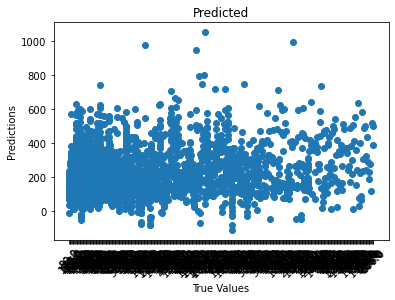

In [124]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted')
plt.xticks(rotation=45)

In [125]:
print('Score:', model.score(X_test, y_test))

Score: 0.28478289270098456


In [ ]:
# Linear Regression MOdel 2 

In [136]:
df2 = df2.dropna(axis=1)
df2

,host_id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,room_type,reviews_per_month
1,1169,1.0,1.0,3.0,1.0,1.0,2.0,170.0,1120.0,4200.0,100.0,100.0,2.0,1.0,1.0,30.0,30.0,1.0,30.0,1.0,3.0,7.0,92.0,192.0,56.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,26,0,1.6
2,8904,2.0,2.0,5.0,1.0,2.0,3.0,235.0,1600.0,5500.0,0,100.0,2.0,30.0,30.0,60.0,60.0,30.0,60.0,0.0,0.0,0.0,0.0,111.0,0.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,1.0,1.0,0.0,0.0,3,0,0.9
3,21994,10.0,10.0,2.0,4.0,1.0,1.0,65.0,485.0,1685.0,200.0,50.0,1.0,32.0,32.0,60.0,60.0,32.0,60.0,30.0,60.0,90.0,365.0,17.0,0.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,0.0,9.0,0.0,6,1,0.1
4,21994,10.0,10.0,2.0,4.0,1.0,1.0,65.0,490.0,1685.0,200.0,50.0,1.0,32.0,32.0,90.0,90.0,32.0,90.0,11.0,41.0,71.0,346.0,8.0,1.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,9.0,0.0,9.0,0.0,6,1,0.1
5,24215,2.0,2.0,5.0,1.5,2.0,2.0,685.0,0,0,0.0,225.0,2.0,4.0,4.0,1125.0,1125.0,4.0,1125.0,30.0,60.0,90.0,90.0,27.0,1.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,2.0,0.0,0.0,0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,94857021,2.0,2.0,2.0,1.0,2.0,2.0,475.0,0,0,0,0,1.0,3.0,4.0,1125.0,1125.0,3.2,1125.0,26.0,56.0,86.0,86.0,0.0,0.0,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,32,0,0
7572,4430421,92.0,92.0,3.0,1.0,1.0,1.0,115.0,0,0,0.0,95.0,1.0,30.0,30.0,150.0,150.0,30.0,150.0,23.0,53.0,83.0,173.0,0.0,0.0,0,0,0,0,0,0,0,92.0,91.0,1.0,0.0,32,0,0
7573,50247302,2.0,2.0,6.0,1.5,2.0,2.0,500.0,0,0,0.0,75.0,4.0,1.0,1.0,10.0,10.0,1.0,10.0,7.0,9.0,9.0,9.0,0.0,0.0,0,0,0,0,0,0,0,2.0,1.0,1.0,0.0,29,0,0
7574,163879334,3.0,3.0,6.0,1.0,2.0,3.0,180.0,0,0,1000.0,150.0,4.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,16.0,46.0,76.0,107.0,0.0,0.0,0,0,0,0,0,0,0,3.0,2.0,1.0,0.0,35,0,0


In [137]:
df2.dtypes

host_id                                         object
host_listings_count                             object
host_total_listings_count                       object
accommodates                                    object
bathrooms                                       object
bedrooms                                        object
beds                                            object
price                                           object
weekly_price                                    object
monthly_price                                   object
security_deposit                                object
cleaning_fee                                    object
guests_included                                 object
minimum_nights                                  object
maximum_minimum_nights                          object
minimum_maximum_nights                          object
maximum_maximum_nights                          object
minimum_nights_avg_ntm                          object
maximum_ni

In [138]:
df2['host_id'] = le.fit_transform(df2.host_id.values) 
df2['host_listings_count'] = le.fit_transform(df2.host_listings_count.values) 
df2['host_total_listings_count'] = le.fit_transform(df2.host_total_listings_count.values) 
df2['accommodates'] = le.fit_transform(df2.accommodates.values) 
df2['price'] = le.fit_transform(df2.price.values) 
df2['guests_included'] = le.fit_transform(df2.guests_included.values) 
df2['guests_included'] = le.fit_transform(df2.guests_included.values) 
df2['minimum_nights'] = le.fit_transform(df2.minimum_nights.values) 
df2['maximum_minimum_nights'] = le.fit_transform(df2.maximum_minimum_nights.values) 
df2['minimum_maximum_nights'] = le.fit_transform(df2.minimum_maximum_nights.values) 
df2['maximum_maximum_nights '] = le.fit_transform(df2.maximum_maximum_nights .values) 
df2['minimum_nights_avg_ntm'] = le.fit_transform(df2.minimum_nights_avg_ntm.values) 
df2['maximum_nights_avg_ntm'] = le.fit_transform(df2.maximum_nights_avg_ntm.values) 
df2['availability_30'] = le.fit_transform(df2.availability_30.values) 
df2['availability_60'] = le.fit_transform(df2.availability_60.values) 
df2['availability_90'] = le.fit_transform(df2.availability_90.values) 
df2['availability_365'] = le.fit_transform(df2.availability_365.values) 
df2['number_of_reviews'] = le.fit_transform(df2.number_of_reviews.values) 
df2['number_of_reviews_ltm'] = le.fit_transform(df2.number_of_reviews_ltm.values) 
df2['calculated_host_listings_count'] = le.fit_transform(df2.calculated_host_listings_count.values) 
df2['calculated_host_listings_count_entire_homes '] = le.fit_transform(df2.calculated_host_listings_count_entire_homes .values) 
df2['calculated_host_listings_count_private_rooms'] = le.fit_transform(df2.calculated_host_listings_count_private_rooms.values)
df2['calculated_host_listings_count_shared_rooms'] = le.fit_transform(df2.calculated_host_listings_count_shared_rooms.values)

In [139]:
df2.dtypes

host_id                                          int32
host_listings_count                              int32
host_total_listings_count                        int32
accommodates                                     int32
bathrooms                                       object
bedrooms                                        object
beds                                            object
price                                            int32
weekly_price                                    object
monthly_price                                   object
security_deposit                                object
cleaning_fee                                    object
guests_included                                  int64
minimum_nights                                   int32
maximum_minimum_nights                           int32
minimum_maximum_nights                           int32
maximum_maximum_nights                          object
minimum_nights_avg_ntm                           int32
maximum_ni

In [140]:
X = df2.drop('price', axis = 1)
lm=LinearRegression()
lm

LinearRegression()

In [141]:
lm.fit(X,df2.price)

LinearRegression()

In [142]:
lm.predict(X)

array([162.42074521, 204.01203772, 321.55025648, ..., 178.39610041,
       170.63379757, 185.55723681])

In [143]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 154.43218419155556


In [144]:
print("Number of coeffiients:", len(lm.coef_))

Number of coeffiients: 40


In [145]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,host_id,0.002568
1,host_listings_count,0.218014
2,host_total_listings_count,0.218014
3,accommodates,-5.235693
4,bathrooms,16.185030
5,bedrooms,20.502325
6,beds,7.485358
7,weekly_price,0.003900
8,monthly_price,-0.002278
9,security_deposit,-0.010565


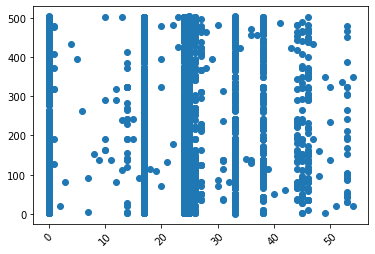

In [146]:
# True PLot
plt.scatter(df2.minimum_nights, df2.price)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.xticks(rotation=45)
plt.show()

In [147]:
lm.predict(X)[0:5]

array([162.42074521, 204.01203772, 321.55025648, 353.99479439,
       210.71661718])

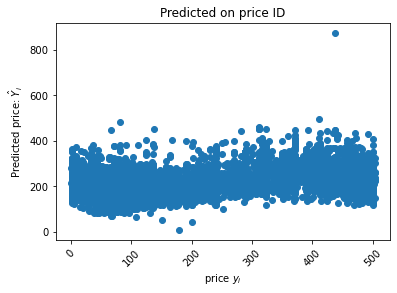

In [148]:
# Prediction PLot
plt.scatter(df2.price, lm.predict(X))
plt.xlabel('price $y_i$')
plt.ylabel('Predicted price: $\hat{Y}_i$')
plt.title('Predicted on price ID')
plt.xticks(rotation=45)
plt.show()

In [149]:
mseFull = np.mean((df2.price - lm.predict(X)) ** 2)
print(mseFull)

22110.75385550316


In [150]:
v = np.var(X)
print("variance", v)

variance host_id                                         1.442344e+06
host_listings_count                             3.565887e+02
host_total_listings_count                       3.565887e+02
accommodates                                    1.003424e+01
guests_included                                 6.480794e+00
minimum_nights                                  1.206550e+02
maximum_minimum_nights                          1.706717e+03
minimum_maximum_nights                          1.867289e+03
minimum_nights_avg_ntm                          2.352391e+03
maximum_nights_avg_ntm                          4.375798e+03
availability_30                                 1.228940e+02
availability_60                                 4.484524e+02
availability_90                                 9.087368e+02
availability_365                                1.466309e+04
number_of_reviews                               1.988508e+04
number_of_reviews_ltm                           1.350129e+03
calculated_host

In [151]:
lm = LinearRegression()
lm.fit(X[['minimum_nights']], df2.price)

LinearRegression()

In [155]:
mse2 = np.mean((df2.price - lm.predict(X[['minimum_nights']])) ** 2)
mse2

25394.1741190435

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, df2.price, test_size=.33, random_state=1000)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5075, 40)
(2500, 40)
(5075,)
(2500,)


In [157]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [158]:
print("Fit a model X_train, and calculate MSE with Y_train:"), np.mean((Y_train-lm.predict(X_train)) ** 2)
print("Fit a model X_train, and calculate MSE with X_test, Y_test:"), np.mean((Y_test-lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train:
Fit a model X_train, and calculate MSE with X_test, Y_test:


(None, 22895.8325980217)

Text(0, 0.5, 'Residuals')

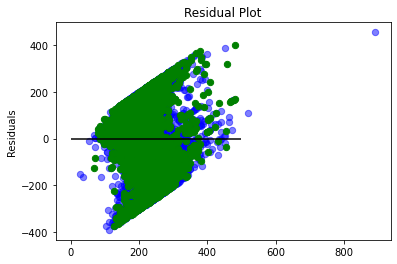

In [159]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=500, color="black")
plt.title('Residual Plot')
plt.ylabel('Residuals')

In [ ]:
# Decision Tree

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn import tree

In [67]:
df4 = pd.read_csv("sf_airbnb_listings.csv", sep=",", header=None, engine='python', encoding="utf-8-sig") 

In [68]:
header = df4.iloc[0]
# take the rest of your data minus the header row
df4 = df4[1:]
# set the header row as the df header
df4.columns = header
pd.set_option('display.max_rows', 7500)
pd.set_option('display.max_columns', 106)
df4

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
1,958,https://www.airbnb.com/rooms/958,2.02E+13,6/2/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,7/31/2008,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/efdad96a-3...,https://a0.muscache.com/im/pictures/efdad96a-3...,Duboce Triangle,1.0,1.0,"[''''email'''', ''''phone'''', ''''facebook'''...",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3.0,1.0,1.0,2.0,Real Bed,"{TV,Cable TV,Internet,Wifi,Kitchen,Pets live o...",NaN,170.0,1120.0,4200.0,100.0,100.0,2.0,25.0,1.0,30.0,1.0,1.0,30.0,30.0,1.0,30.0,2 months ago,t,1.0,3.0,7.0,92.0,6/2/2019,192.0,56.0,7/23/2009,5/16/2019,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,{SAN FRANCISCO},t,f,moderate,f,f,1.0,1.0,0.0,0.0,1.6
2,5858,https://www.airbnb.com/rooms/5858,2.02E+13,6/2/2019,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,3/2/2009,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.c

In [225]:
columns4="host_listings_count accommodates host_response_rate bedrooms beds guests_included maximum_nights minimum_nights availability_30 availability_365 number_of_reviews  review_scores_rating price weekly_price monthly_price security_deposit cleaning_fee room_type reviews_per_month".split()
columns5="host_id host_listings_count accommodates bathrooms bedrooms beds guests_included minimum_nights availability_30 availability_365 number_of_reviews  review_scores_rating  neighbourhood room_type reviews_per_month".split()
df6=pd.DataFrame(df4, columns=columns4)
df6.fillna(0, inplace=True)
df6
#df6.to_csv('df6.csv')

,host_listings_count,accommodates,host_response_rate,bedrooms,beds,guests_included,maximum_nights,minimum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,price,weekly_price,monthly_price,security_deposit,cleaning_fee,room_type,reviews_per_month
1,1.0,3.0,100%,1.0,2.0,2.0,30.0,1.0,1.0,92.0,192.0,97.0,170.0,1120.0,4200.0,100.0,100.0,Entire home/apt,1.6
2,2.0,5.0,100%,2.0,3.0,2.0,60.0,30.0,0.0,0.0,111.0,98.0,235.0,1600.0,5500.0,0,100.0,Entire home/apt,0.9
3,10.0,2.0,100%,1.0,1.0,1.0,60.0,32.0,30.0,365.0,17.0,85.0,65.0,485.0,1685.0,200.0,50.0,Private room,0.1
4,10.0,2.0,100%,1.0,1.0,1.0,90.0,32.0,11.0,346.0,8.0,93.0,65.0,490.0,1685.0,200.0,50.0,Private room,0.1
5,2.0,5.0,100%,2.0,2.0,2.0,1125.0,4.0,30.0,90.0,27.0,97.0,685.0,0,0,0.0,225.0,Entire home/apt,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,2.0,2.0,100%,2.0,2.0,1.0,1125.0,3.0,26.0,86.0,0.0,0,475.0,0,0,0,0,Entire home/apt,0
7572,92.0,3.0,99%,1.0,1.0,1.0,150.0,30.0,23.0,173.0,0.0,0,115.0,0,0,0.0,95.0,Entire home/apt,0
7573,2.0,6.0,100%,2.0,2.0,4.0,10.0,1.0,7.0,9.0,0.0,0,500.0,0,0,0.0,75.0,Entire home/apt,0
7574,3.0,6.0,100%,2.0,3.0,4.0,1125.0,30.0,16.0,107.0,0.0,0,180.0,0,0,1000.0,150.0,Entire home/apt,0


In [226]:
#df6['neighbourhood'] = le.fit_transform(df6.neighbourhood.values) 
df6['room_type'] = le.fit_transform(df6.room_type.values) 
df6['host_response_rate'] = df6['host_response_rate'].str.rstrip('%').astype('float') / 100.0
# df6['host_response_rate'] = le.fit_transform(df6.host_response_rate.values) 
df6

,host_listings_count,accommodates,host_response_rate,bedrooms,beds,guests_included,maximum_nights,minimum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,price,weekly_price,monthly_price,security_deposit,cleaning_fee,room_type,reviews_per_month
1,1.0,3.0,1.00,1.0,2.0,2.0,30.0,1.0,1.0,92.0,192.0,97.0,170.0,1120.0,4200.0,100.0,100.0,0,1.6
2,2.0,5.0,1.00,2.0,3.0,2.0,60.0,30.0,0.0,0.0,111.0,98.0,235.0,1600.0,5500.0,0,100.0,0,0.9
3,10.0,2.0,1.00,1.0,1.0,1.0,60.0,32.0,30.0,365.0,17.0,85.0,65.0,485.0,1685.0,200.0,50.0,1,0.1
4,10.0,2.0,1.00,1.0,1.0,1.0,90.0,32.0,11.0,346.0,8.0,93.0,65.0,490.0,1685.0,200.0,50.0,1,0.1
5,2.0,5.0,1.00,2.0,2.0,2.0,1125.0,4.0,30.0,90.0,27.0,97.0,685.0,0,0,0.0,225.0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,2.0,2.0,1.00,2.0,2.0,1.0,1125.0,3.0,26.0,86.0,0.0,0,475.0,0,0,0,0,0,0
7572,92.0,3.0,0.99,1.0,1.0,1.0,150.0,30.0,23.0,173.0,0.0,0,115.0,0,0,0.0,95.0,0,0
7573,2.0,6.0,1.00,2.0,2.0,4.0,10.0,1.0,7.0,9.0,0.0,0,500.0,0,0,0.0,75.0,0,0
7574,3.0,6.0,1.00,2.0,3.0,4.0,1125.0,30.0,16.0,107.0,0.0,0,180.0,0,0,1000.0,150.0,0,0


In [227]:
df6 = df6.dropna(axis=1)
df6

,host_listings_count,accommodates,bedrooms,beds,guests_included,maximum_nights,minimum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,price,weekly_price,monthly_price,security_deposit,cleaning_fee,room_type,reviews_per_month
1,1.0,3.0,1.0,2.0,2.0,30.0,1.0,1.0,92.0,192.0,97.0,170.0,1120.0,4200.0,100.0,100.0,0,1.6
2,2.0,5.0,2.0,3.0,2.0,60.0,30.0,0.0,0.0,111.0,98.0,235.0,1600.0,5500.0,0,100.0,0,0.9
3,10.0,2.0,1.0,1.0,1.0,60.0,32.0,30.0,365.0,17.0,85.0,65.0,485.0,1685.0,200.0,50.0,1,0.1
4,10.0,2.0,1.0,1.0,1.0,90.0,32.0,11.0,346.0,8.0,93.0,65.0,490.0,1685.0,200.0,50.0,1,0.1
5,2.0,5.0,2.0,2.0,2.0,1125.0,4.0,30.0,90.0,27.0,97.0,685.0,0,0,0.0,225.0,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571,2.0,2.0,2.0,2.0,1.0,1125.0,3.0,26.0,86.0,0.0,0,475.0,0,0,0,0,0,0
7572,92.0,3.0,1.0,1.0,1.0,150.0,30.0,23.0,173.0,0.0,0,115.0,0,0,0.0,95.0,0,0
7573,2.0,6.0,2.0,2.0,4.0,10.0,1.0,7.0,9.0,0.0,0,500.0,0,0,0.0,75.0,0,0
7574,3.0,6.0,2.0,3.0,4.0,1125.0,30.0,16.0,107.0,0.0,0,180.0,0,0,1000.0,150.0,0,0


In [228]:
main_columns = columns4
X = df6 # main data
y = df.neighbourhood # Target variable

In [229]:
df6.shape

(7575, 18)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, random_state=2000)

In [231]:
classifier = DecisionTreeClassifier(max_depth=2) # chooses the depth 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [232]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # returns the accuracy 

Accuracy: 0.14785478547854786


In [233]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                       precision    recall  f1-score   support

         Alamo Square       0.00      0.00      0.00        23
       Balboa Terrace       0.00      0.00      0.00        16
              Bayview       0.00      0.00      0.00        78
       Bernal Heights       0.00      0.00      0.00       165
            Chinatown       0.00      0.00      0.00        22
         Civic Center       0.00      0.00      0.00         6
          Cole Valley       0.00      0.00      0.00        48
           Cow Hollow       0.00      0.00      0.00        25
       Crocker Amazon       0.00      0.00      0.00        45
            Daly City       0.00      0.00      0.00         1
      Diamond Heights       0.00      0.00      0.00         8
             Dogpatch       0.00      0.00      0.00        15
             Downtown       0.34      0.58      0.43       1

C:\Users\kevin\Anaconda3\envs\r-tutorial\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(1162.5, 1887.5, 'host_listings_count <= 8.5\ngini = 0.961\nsamples = 4545\nvalue = [40, 29, 92, 229, 44, 19, 77, 37, 58, 5, 11, 21\n201, 68, 82, 33, 1, 23, 10, 37, 140, 57, 32, 91\n1, 28, 57, 68, 25, 426, 40, 176, 206, 25, 25\n225, 96, 28, 29, 116, 18, 241, 68, 1, 313, 58\n55, 83, 69, 197, 42, 81, 37, 7, 267]'),
 Text(581.25, 1132.5, 'room_type <= 3.85\ngini = 0.955\nsamples = 3363\nvalue = [22, 29, 78, 221, 23, 14, 45, 30, 47, 4, 11, 12\n42, 57, 62, 4, 1, 19, 10, 36, 84, 32, 31, 84\n1, 21, 46, 61, 2, 362, 32, 98, 180, 22, 23, 217\n66, 25, 29, 105, 14, 230, 45, 1, 195, 18, 53, 46\n18, 170, 42, 3, 31, 7, 202]'),
 Text(290.625, 377.5, 'gini = 0.955\nsamples = 2790\nvalue = [19, 26, 56, 194, 23, 14, 42, 27, 38, 4, 8, 12\n33, 53, 45, 4, 1, 17, 7, 31, 71, 29, 29, 61, 0\n19, 35, 57, 1, 309, 24, 87, 161, 20, 19, 129, 60\n21, 10, 89, 14, 176, 42, 1, 174, 18, 44, 39, 13\n137, 33, 3, 19, 7, 185]'),
 Text(871.875, 377.5, 'gini = 0.941\nsamples = 573\nvalue = [3, 3, 22, 27, 0, 0, 3, 3, 9, 0,

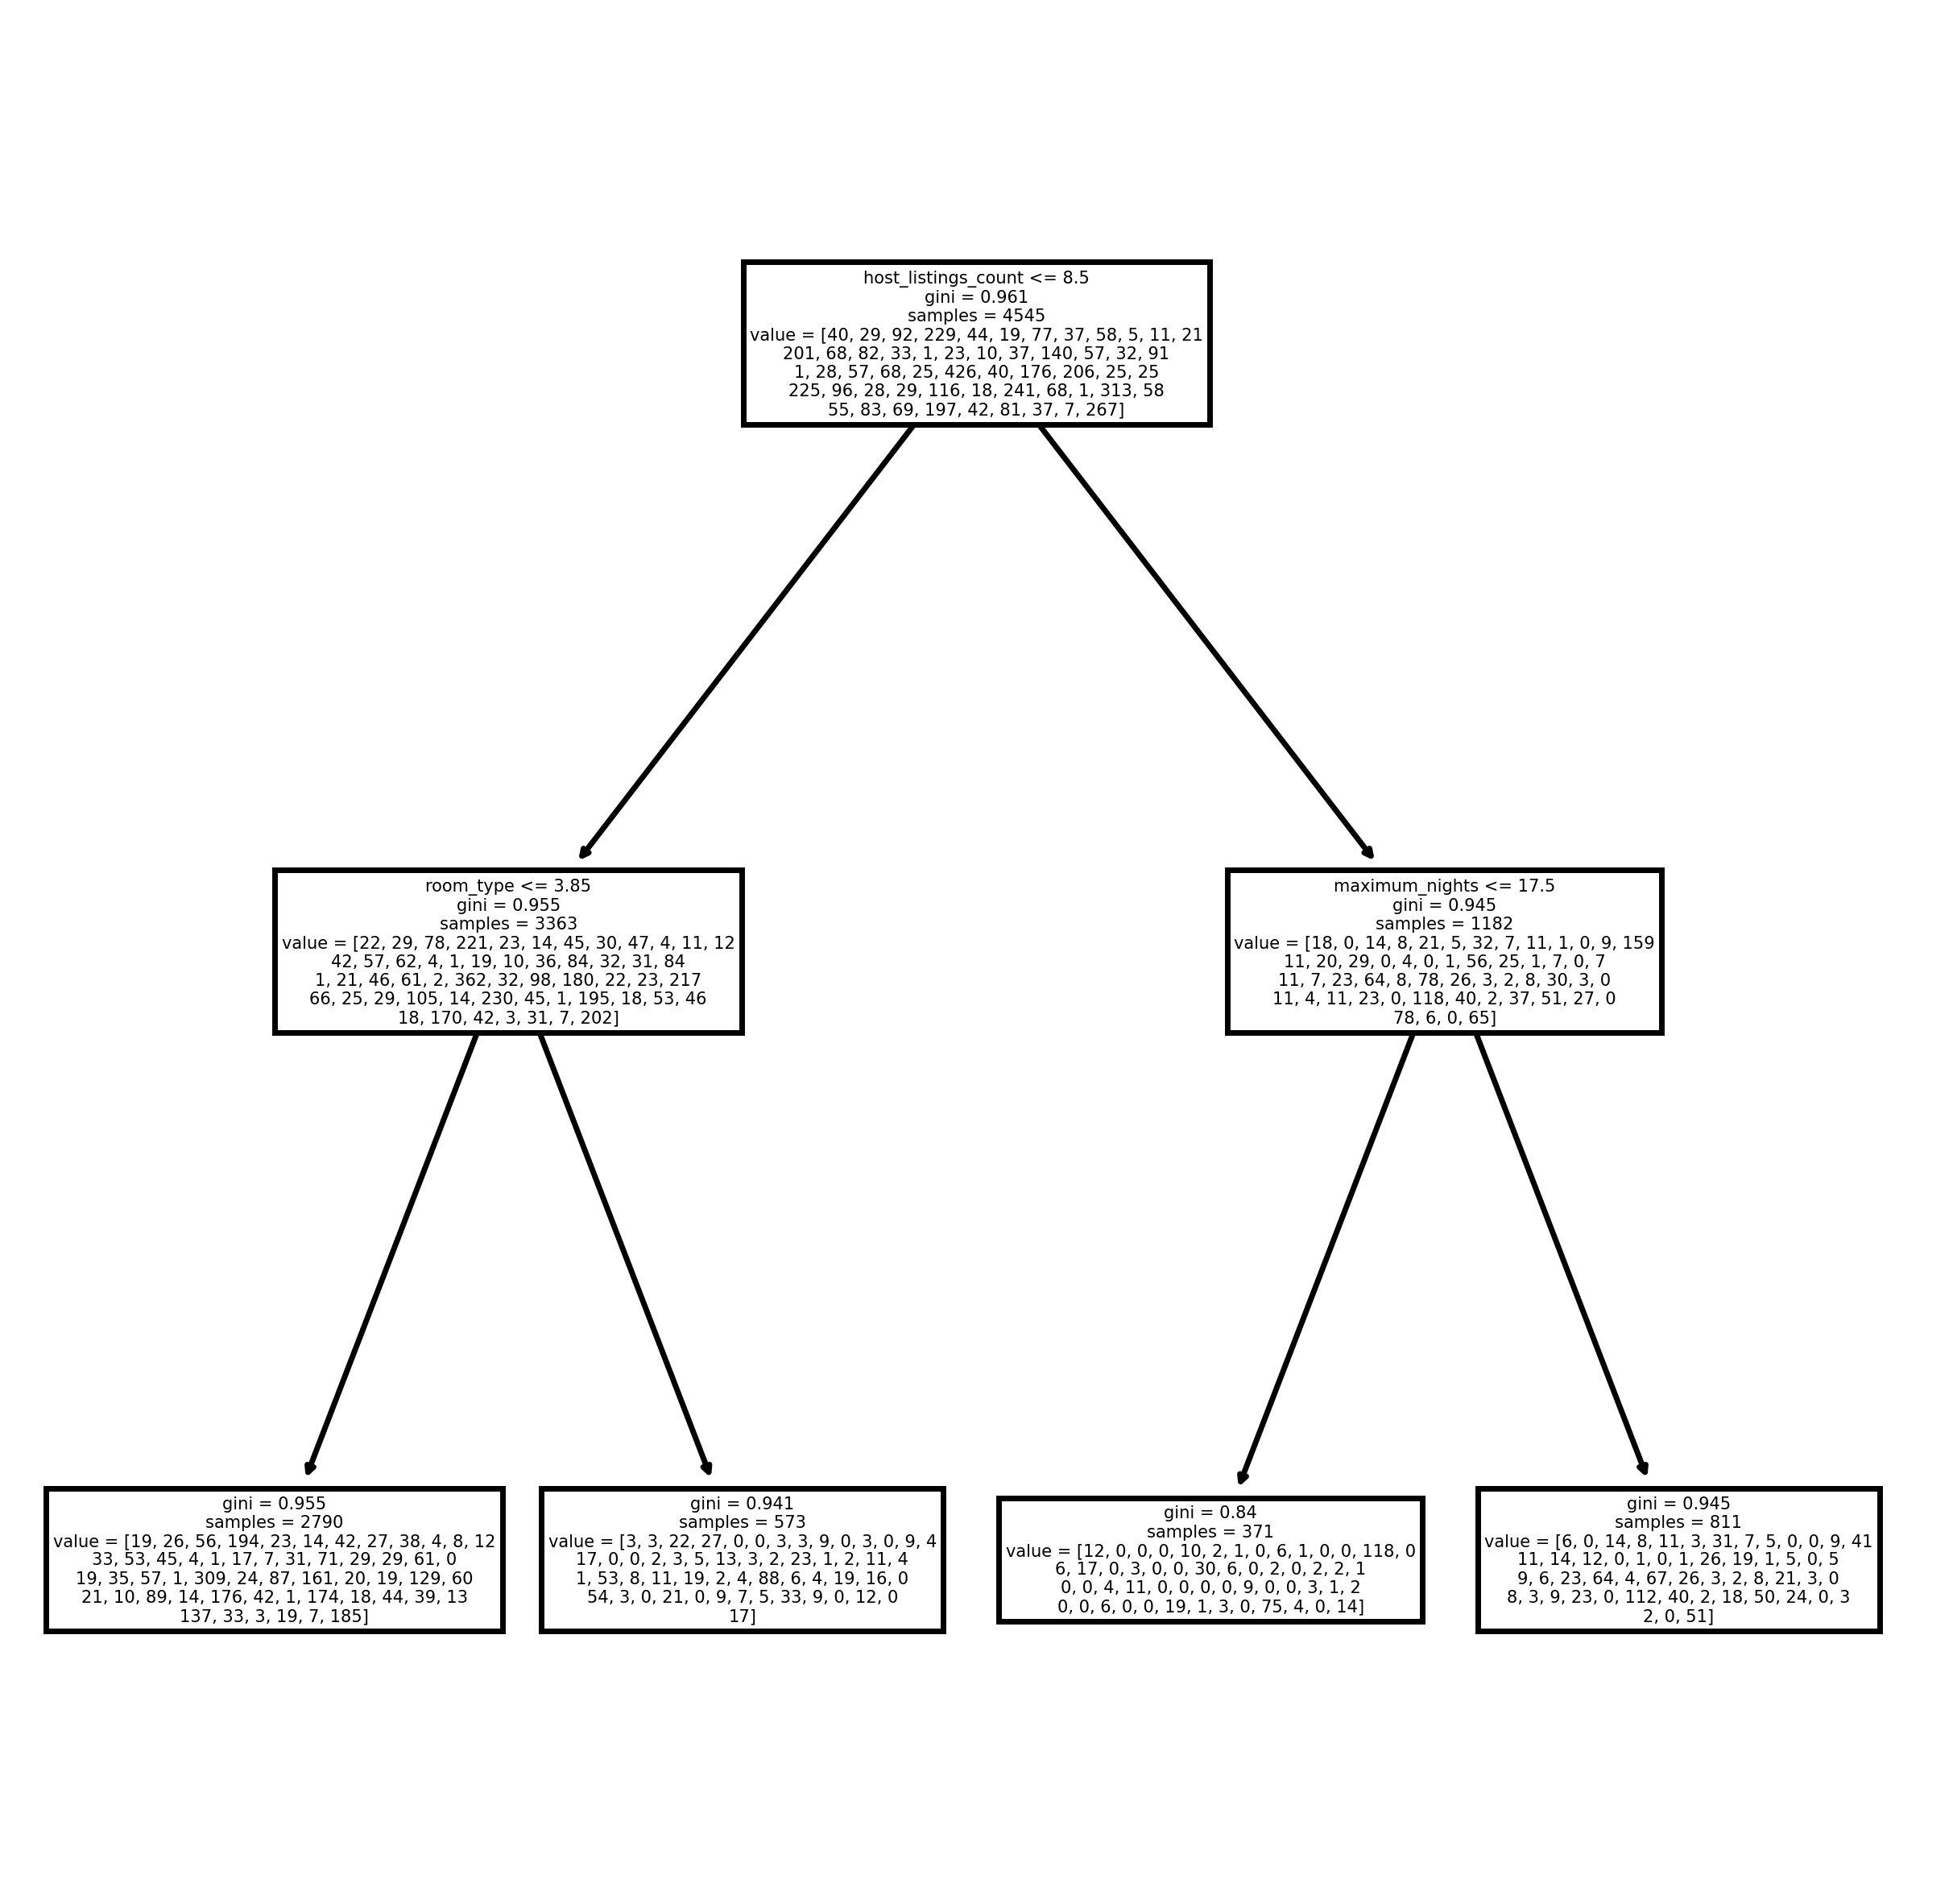

In [234]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
tree.plot_tree(classifier, feature_names = main_columns, filled=False) # plots the tree 